In [1]:
%matplotlib inline
#%matplotlib notebook
#%matplotlib widget
import matplotlib 
import numpy as np
import pandas as pd
import os, sys
#import ipywidgets
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d.art3d import Poly3DCollection    
 
# use LaTeX, choose nice some looking fonts and tweak some settings
matplotlib.rc('font', family='serif')
matplotlib.rc('font', size=16)
matplotlib.rc('legend', fontsize=16)
matplotlib.rc('legend', numpoints=1)
matplotlib.rc('legend', handlelength=1.5)
matplotlib.rc('legend', frameon=False)
matplotlib.rc('xtick.major', pad=7)
matplotlib.rc('xtick.minor', pad=7)
matplotlib.rc('text', usetex=True)
# matplotlib.rc('text.latex', 
#               preamble=[r'\usepackage[T1]{fontenc}',
#                         r'\usepackage{amsmath}',
#                         r'\usepackage{txfonts}',
#                         r'\usepackage{textcomp}'])

matplotlib.rc('figure', figsize=(12, 9))

In [271]:
psddatafolder = r"/home/jiyongso/mydocs/psddata/FILTERED"
datafilename1 = r"DataF_CH2@DT5730B_1080_Cf252_Mod_Bare_1800s.csv"
psddata = pd.read_csv(os.path.join(psddatafolder, datafilename1), sep=";", skiprows=[0,], header=None)
# psddata.drop(columns=[0, 1, 3, 4, 5], inplace=True)
# psddata.to_pickle(os.path.join(psddatafolder, "ch2data.pkl"))


psd = pd.read_pickle(os.path.join(psddatafolder, "ch2data.pkl"))
print("original data shape = ", psd.shape)
dmax, dmin =(psd.iloc[:, 1:]).max(axis=1), (psd.iloc[:, 1:]).min(axis=1)

# spectrum 의 최대값과 최소값의 차가 100 보다 작은 spectrum을 제거한다.
psd=psd[(dmax-dmin)>100]
print("wave의 최대값-최소값이 100 이하인 wave를 제거한후의 shape = ", psd.shape)
# spectrum을 반전시키는데, 최소값을 1로 한다.
psd.iloc[:,1:]=dmax.max()-psd.iloc[:,1:]+1

# pile up 된 wave를 제거한다.
maxargindex=(psd.iloc[:, 1:]).apply(np.argmax, axis=1)
psd = psd[maxargindex<60]
print("Pile up wave 제거 후 shape = ", psd.shape)

psd.to_pickle(os.path.join(psddatafolder, "ch2data_2.pkl"))

original data shape =  (2231198, 169)
wave의 최대값-최소값이 100 이하인 wave를 제거한후의 shape =  (2215550, 169)
Pile up wave 제거 후 shape =  (2214847, 169)


In [256]:
maxargindex=(psd.iloc[:, 1:]).apply(np.argmax, axis=1)
ss=np.where(maxargindex>57)
ss[0]

array([    222,     236,     528, ..., 2214289, 2214746, 2214791])

In [231]:
ss=np.where(maxargindex>57)
ss[0]

array([    222,     236,     528, ..., 2214992, 2215449, 2215494])

In [242]:
ss[0].shape

(12117,)

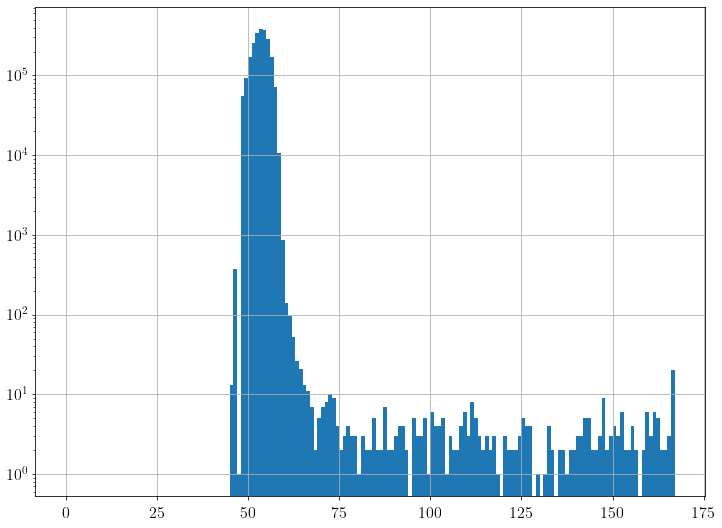

In [272]:
maxargindex.hist(bins=np.arange(168))
plt.yscale('log')

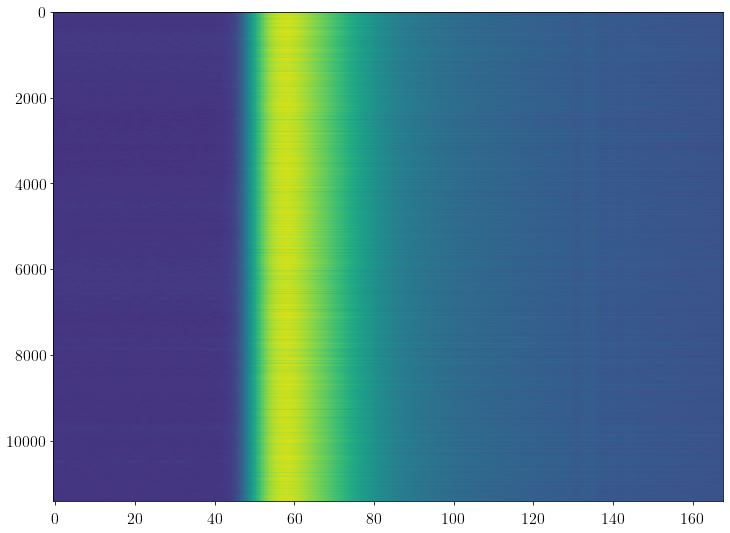

In [269]:
plt.imshow(np.log10(psd.iloc[ss[0], 1:]), aspect='auto')
#plt.savefig("pileup1.png")

<AxesSubplot:>

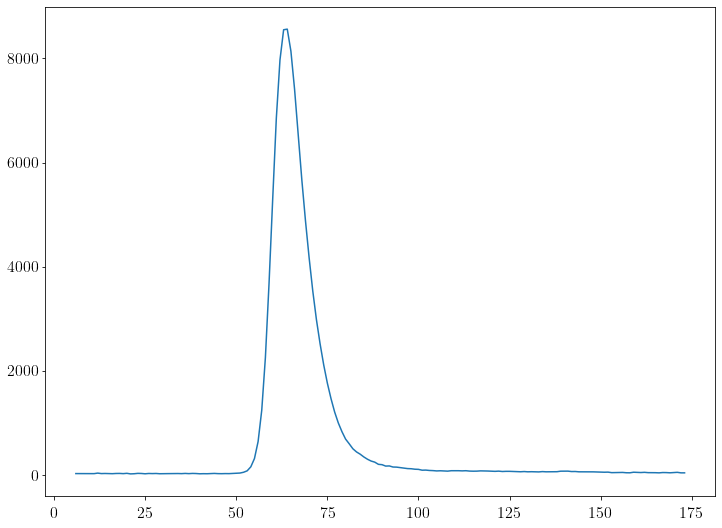

In [266]:
(psd.iloc[236, 1:]).plot()

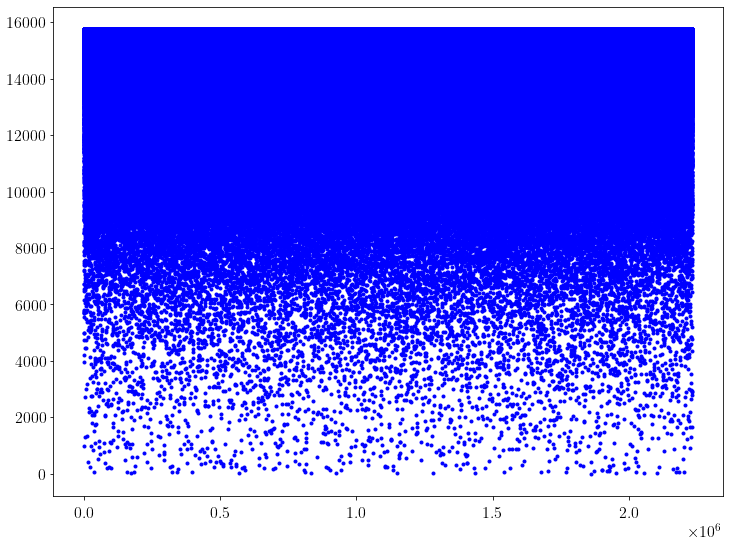

In [6]:
#plt.plot(dmax, "r-")
plt.plot(dmin, "b.")

In [9]:
ddmin, ddmax = np.array(dmin), np.array(dmax)

In [10]:
np.where((ddmin<100))

(array([  37988,  159759,  172346,  184175,  324546,  342485,  396470,
         570282,  811608,  834923,  923588, 1147171, 1282169, 1434297,
        1539317, 1677966, 1703471, 1768882, 1860390, 1869209, 1919834,
        1927242, 1950327, 2026361, 2052989, 2101019, 2171771, 2182220,
        2201541]),)

In [11]:
ddmax.max(), psd_std

(15791,
 0           405.984284
 1           139.250195
 2            38.743945
 3           126.713962
 4          2096.746242
               ...     
 2231193     117.904287
 2231194      50.591861
 2231195     185.527956
 2231196     561.006190
 2231197     949.213225
 Length: 2231198, dtype: float64)

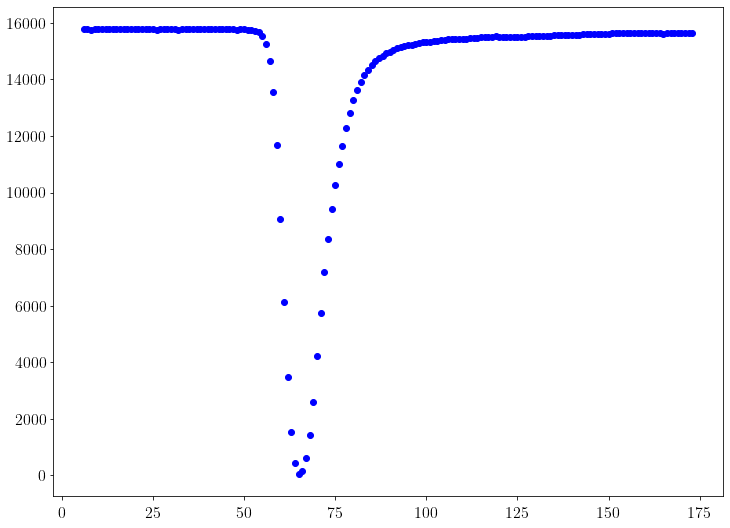

In [12]:
dd = psd.iloc[37988, 1:]
plt.plot(dd, "bo")

In [70]:
x=np.where(((ddmax-ddmin)<150) & ((ddmax-ddmin)>100))
x

(array([     15,      18,      34, ..., 2231169, 2231171, 2231187]),)

In [72]:
x[0].shape

(302455,)

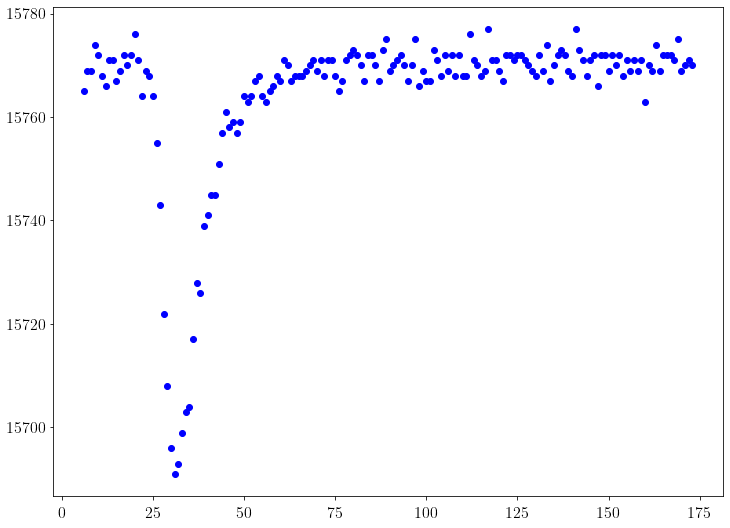

In [69]:
dd = psd.iloc[x[0][2], 1:]
plt.plot(dd, "bo")

<AxesSubplot:>

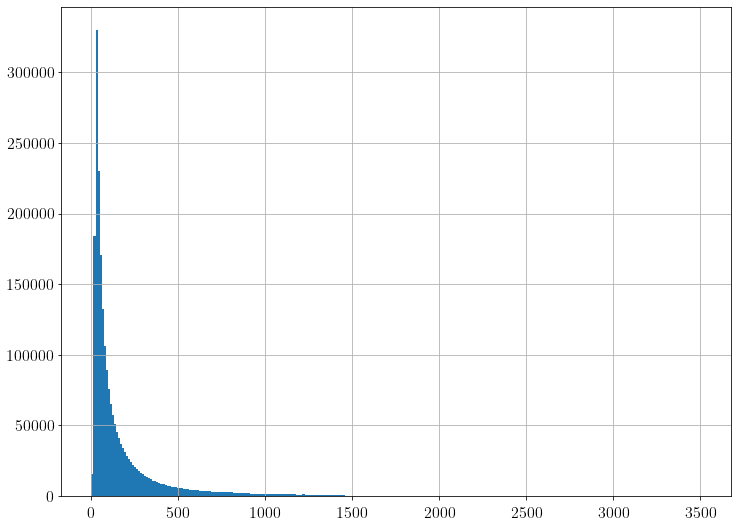

In [158]:
psd_std.hist(bins=300)

In [166]:
stddd = np.where(psd_std<5)

In [169]:
stddd[0].shape

(15642,)